In [1]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd

In [2]:
#### file = 'data/run_1/landaudamp1.vp_energy'
run_id = '8_0'
file_energy = './landaudamp{}/landaudamp{}.vp_energy'.format(run_id,run_id)

file_f1 = './landaudamp{}/landaudamp{}.phase_space.1' .format(run_id,run_id)
file_f2 = './landaudamp{}/landaudamp{}.phase_space.2'.format(run_id,run_id)

file_phi = './landaudamp{}/landaudamp{}.vp_phi'.format(run_id,run_id)
file_number = './landaudamp{}/landaudamp{}.vp_number'.format(run_id,run_id)

#landaudamp8.vp_number

try:
    file_f3 = './landaudamp{}/landaudamp{}.phase_space.3'.format(run_id,run_id)
    data_3 = np.loadtxt(file_f3)
    
    file_f4 = './landaudamp{}/landaudamp{}.phase_space.4'.format(run_id,run_id)
    data_4 = np.loadtxt(file_f4)
except:
    print("No f3,f4")
    
## two more species

try:
    file_f5 = './landaudamp{}/landaudamp{}.phase_space.5'.format(run_id,run_id)
    data_5 = np.loadtxt(file_f5)
    
    file_f6 = './landaudamp{}/landaudamp{}.phase_space.6'.format(run_id,run_id)
    data_6 = np.loadtxt(file_f6)
except:
    print("No f5,f6")

No f3,f4
No f5,f6


nt:101
nx:128
nv:257
No f3,f4
No f5,f6
v_phi:2.86


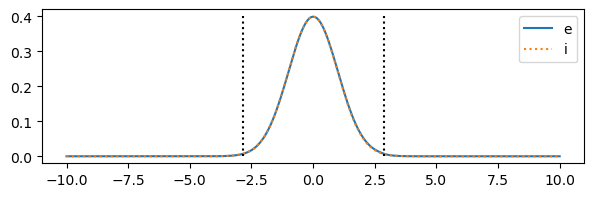

In [3]:
data_1 = np.loadtxt(file_f1)
data_2 = np.loadtxt(file_f2)


## F90 output
##  t,x(j),v(i),fs(ispec,j,i),fs0(ispec,j,i),fsb(ispec,j,i),fsw(ispec,j,i),fsc(ispec,j,i)

t_ax = np.unique(data_1[:,0])
x_ax = np.unique(data_1[:,1])
v_ax = np.unique(data_1[:,2])

# extract dimentions from the data file
nt = len(t_ax)
nx = len(x_ax)
nv = len(v_ax)

print(f"nt:{nt}")
print(f"nx:{nx}")
print(f"nv:{nv}")

f_1 = np.reshape(data_1[:,3],[nv,nx,nt],order='F');
f_2 = np.reshape(data_2[:,3],[nv,nx,nt],order='F');

x = 15
t = 0

nl = 2
# look at cut
kL_de = 1/nl
v_phi = 1.43/kL_de
x_lim = .4

plt.figure(figsize=(7,2))
plt.plot(v_ax,f_1[:,x,0],'-',label='e',markevery=.05)
plt.plot(v_ax,f_2[:,x,0],':',label='i',markevery=.05)


#f_3 = np.reshape(data_3[:,3],[nv,nx,nt],order='F');

try:
    f_3 = np.reshape(data_3[:,3],[nv,nx,nt],order='F');
    f_4 = np.reshape(data_4[:,3],[nv,nx,nt],order='F');
    plt.plot(v_ax,f_3[:,x,0],'-',label='e',markevery=.05)
    plt.plot(v_ax,f_4[:,x,0],':',label='i',markevery=.05)   
    
except:
    print("No f3,f4")

## handel new species

try:
    f_5 = np.reshape(data_5[:,3],[nv,nx,nt],order='F');
    f_6 = np.reshape(data_6[:,3],[nv,nx,nt],order='F');
    plt.plot(v_ax,f_5[:,x,0],'-',label='e',markevery=.05)
    plt.plot(v_ax,f_6[:,x,0],':',label='i',markevery=.05)   
    
except:
    print("No f5,f6")

plt.plot([v_phi,v_phi],[x_lim,0],':k')
plt.plot([-v_phi,-v_phi],[x_lim,0],':k')
plt.legend()

print(f"v_phi:{v_phi}")
#### at large time

# t_i = 20
# plt.plot(v_ax,f_1[:,x,t_i],'-',label='e',markevery=.05)
# plt.plot(v_ax,f_2[:,x,t_i],':',label='i',markevery=.05)

# try:
#     f_3 = np.reshape(data_3[:,3],[nv,nx,nt],order='F');
#     f_4 = np.reshape(data_4[:,3],[nv,nx,nt],order='F');
#     plt.plot(v_ax,f_3[:,x,t_i],'-',label='e',markevery=.05)
#     plt.plot(v_ax,f_4[:,x,t_i],':',label='i',markevery=.05)   
    
# except:
#     pass

# ## handel new species

# try:
#     f_5 = np.reshape(data_5[:,3],[nv,nx,nt],order='F');
#     f_6 = np.reshape(data_6[:,3],[nv,nx,nt],order='F');
#     plt.plot(v_ax,f_5[:,x,t_i],'-',label='e',markevery=.05)
#     plt.plot(v_ax,f_6[:,x,t_i],':',label='i',markevery=.05)   
    
# except:
#     pass

In [4]:
## F90 output
##  t,x(j),v(i),fs(ispec,j,i),fs0(ispec,j,i),fsb(ispec,j,i),fsw(ispec,j,i),fsc(ispec,j,i)


# print(f_1.shape)
# plt.imshow(f_1[:,:,0]+f_3[:,:,0]+f_5[:,:,0])

# plt.colorbar()

Text(0.5, 0, '$v/v_{th}$')

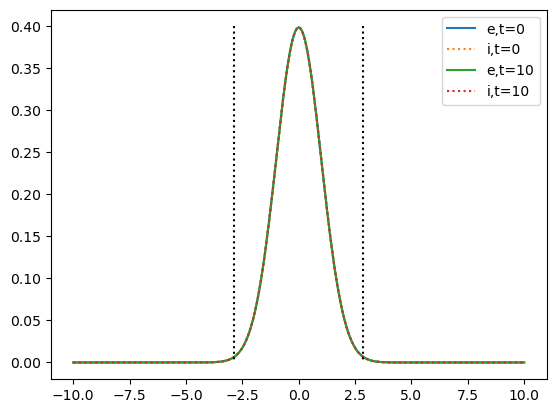

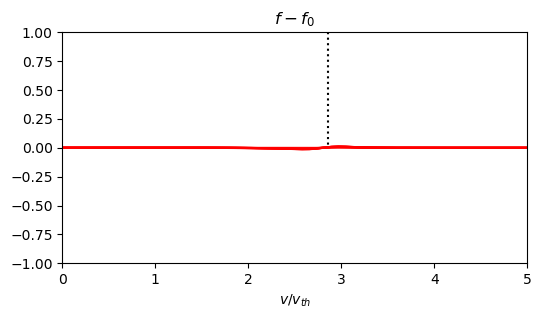

In [5]:



x = 0 
t = 0
# plt.figure()
# plt.plot(v,np.log(f_1[:,x,t]),'-',label='e',markevery=.05)
# plt.plot(v,np.log(f_2[:,x,t]),':',label='i',markevery=.05)
# t= 2
# plt.plot(v,np.log(f_1[:,x,t]),'-',label='e',markevery=.05)
# plt.plot(v,np.log(f_2[:,x,t]),':',label='i',markevery=.05)

plt.figure()
## test
t = 0
plt.plot(v_ax,np.sum(f_1[:,:,t],axis=1)/nx,'-',label='e,t=0',markevery=.05)
plt.plot(v_ax,np.sum(f_2[:,:,t],axis=1)/nx,':',label='i,t=0',markevery=.05)

t = nt-1
plt.plot(v_ax,np.sum(f_1[:,:,t],axis=1)/nx,'-',label='e,t=10',markevery=.05)
plt.plot(v_ax,np.sum(f_2[:,:,t],axis=1)/nx,':',label='i,t=10',markevery=.05)



x_lim = .4

v_phi = 1.43/kL_de

plt.plot([v_phi,v_phi],[x_lim,0],':k')
plt.plot([-v_phi,-v_phi],[x_lim,0],':k')
plt.legend()

#plt.ylim([0,0.02])
#plt.xlim([2,4])
# plt.xlim([0,5])
# plt.ylim([.1,.2])

#### 
plt.figure(figsize=(6,3))

t = 3
x_lim = 6
for t in range(1,nt-20,5):
    plt.plot(v_ax,np.sum(f_1[:,:,t]-f_1[:,:,0],axis=1),'-r',label='e',markevery=.05,alpha=.8*t/nt+.2)
    #plt.plot(v,np.sum(f_2[:,:,t]-f_2[:,:,0],axis=1),':b',label='i',markevery=.05,)
    
    try:
        plt.plot(v_ax,np.sum(f_3[:,:,t]-f_3[:,:,0],axis=1),'-g',label='e',markevery=.05,alpha=.8*t/nt+.2)
        plt.plot(v_ax,np.sum(f_5[:,:,t]-f_5[:,:,0],axis=1),'-b',label='e',markevery=.05,alpha=.8*t/nt+.2)
    except:
        pass
    
plt.title('$f-f_0$')
#v_phi
plt.plot([v_phi,v_phi],[x_lim,0],':k')
plt.plot([-v_phi,-v_phi],[x_lim,0],':k')

plt.xlim([0,5])
plt.ylim([-1,1])
plt.xlabel('$v/v_{th}$')

No f3,f4
No f3,f4
0.00023758983994558896


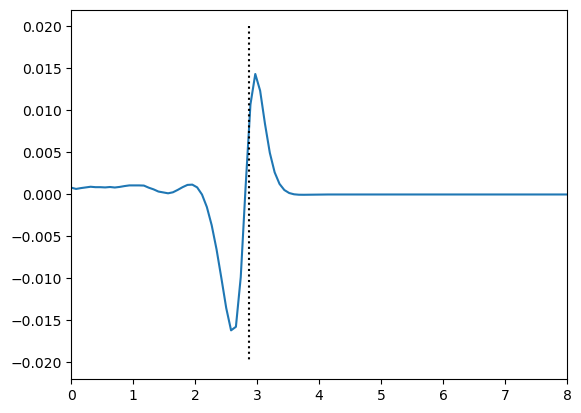

In [6]:
t = nt-1
x_lim = .02
df_t_final = np.sum(f_1[:,:,t]-f_1[:,:,0],axis=1)
try:
    df3_t_final = np.sum(f_3[:,:,t]-f_3[:,:,0],axis=1)
    df4_t_final = np.sum(f_4[:,:,t]-f_4[:,:,0],axis=1)
except:
    print('No f3,f4')
    
plt.plot(v_ax,df_t_final)

try:
    plt.plot(v_ax,df3_t_final)
    plt.plot(v_ax,df4_t_final)
except:
    print('No f3,f4')
    

plt.plot([v_phi,v_phi],[x_lim,-x_lim],':k')
plt.xlim([0,8])

print(np.sum(df_t_final))

## save data for over plotting

import scipy as sp

exp_data = {}


exp_data['v_ax'] = v_ax
exp_data['x_ax'] = x_ax
exp_data['t_ax'] = t_ax

exp_data['f1'] = f_1
exp_data['f2'] = f_2
exp_data['v_phi'] = v_phi

try:
    exp_data['f3'] = f_3
    exp_data['f4'] = f_4
except:
    pass
    

sp.io.savemat(f'./exp_{run_id}_data_f.mat',exp_data)

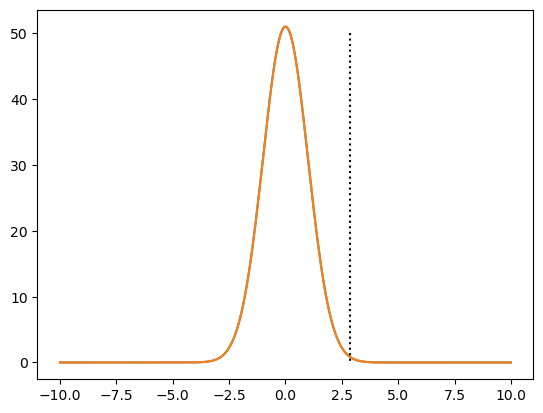

In [7]:

plt.figure()
plt.plot(v_ax,np.sum(f_1[:,:,0],axis=1))
plt.plot(v_ax,np.sum(f_1[:,:,t],axis=1))

plt.plot([v_phi,v_phi],[50,0],':k')


#plt.xlim([2,4])
#plt.ylim([0,2])

In [8]:
# print(v)

dv = v_ax[2]-v_ax[1]
print((10+3.5)/dv)

172.85531370038203


257
128
6.2832


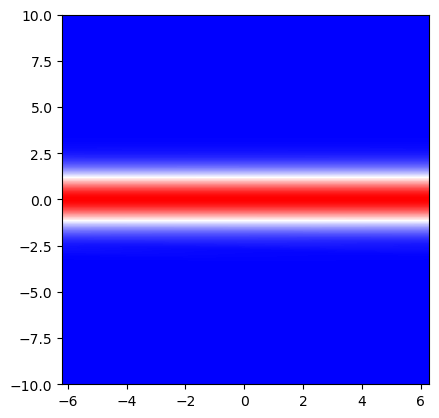

In [9]:
max_v = v_ax[-1]
plt.imshow(f_1[:,:,nt-1],cmap='bwr',extent=[x_ax[0],x_ax[-1],v_ax[0],v_ax[-1]],aspect=x_ax[-1]/max_v)
print(len(v_ax))
print(len(x_ax))
print(x_ax[-1])

In [10]:
# for t in range(0,nt):
#     plt.figure()
#     plt.imshow(f_1[:,:,t],cmap='bwr')
#     plt.title(t)

## $n(x)$ using f

(128, 101)


Text(0.5, 1.0, 'n(x)')

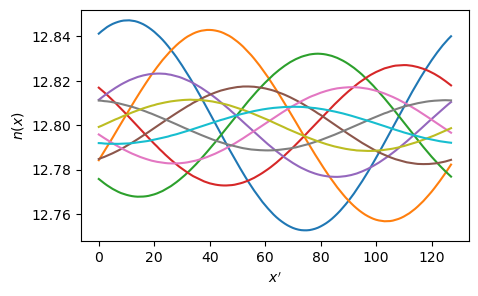

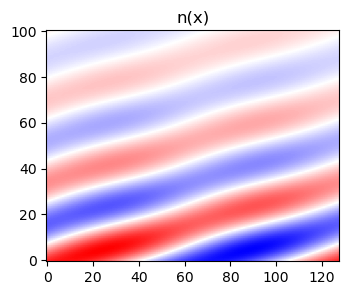

In [11]:
nr_data = np.sum(f_1,axis=0)
#nr_data_2 = np.sum(f_2,axis=0)

print(np.shape(nr_data))


plt.figure(figsize=(5,3))

plt.plot(nr_data[:,0:-1:10])
plt.xlabel(r'$x^\prime$')
plt.ylabel(r'$n(x)$')


## stack plot

plt.figure(figsize=(5,3))
plt.imshow(np.transpose(nr_data),aspect=1,origin='lower',cmap='bwr')
#plt.imshow(np.transpose(nr_data_2),':',aspect=2,origin='lower')

plt.title(r'n(x)')

## data $\phi$

In [12]:
data_phi = np.loadtxt(file_phi)

print(np.shape(data_phi))

(12928, 5)


phi shape:(128, 101)


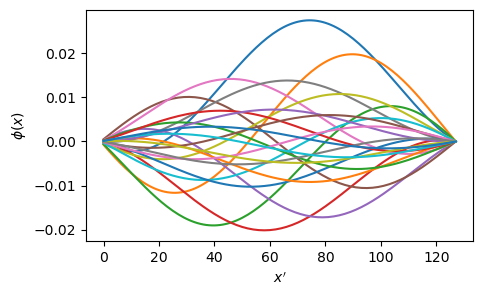

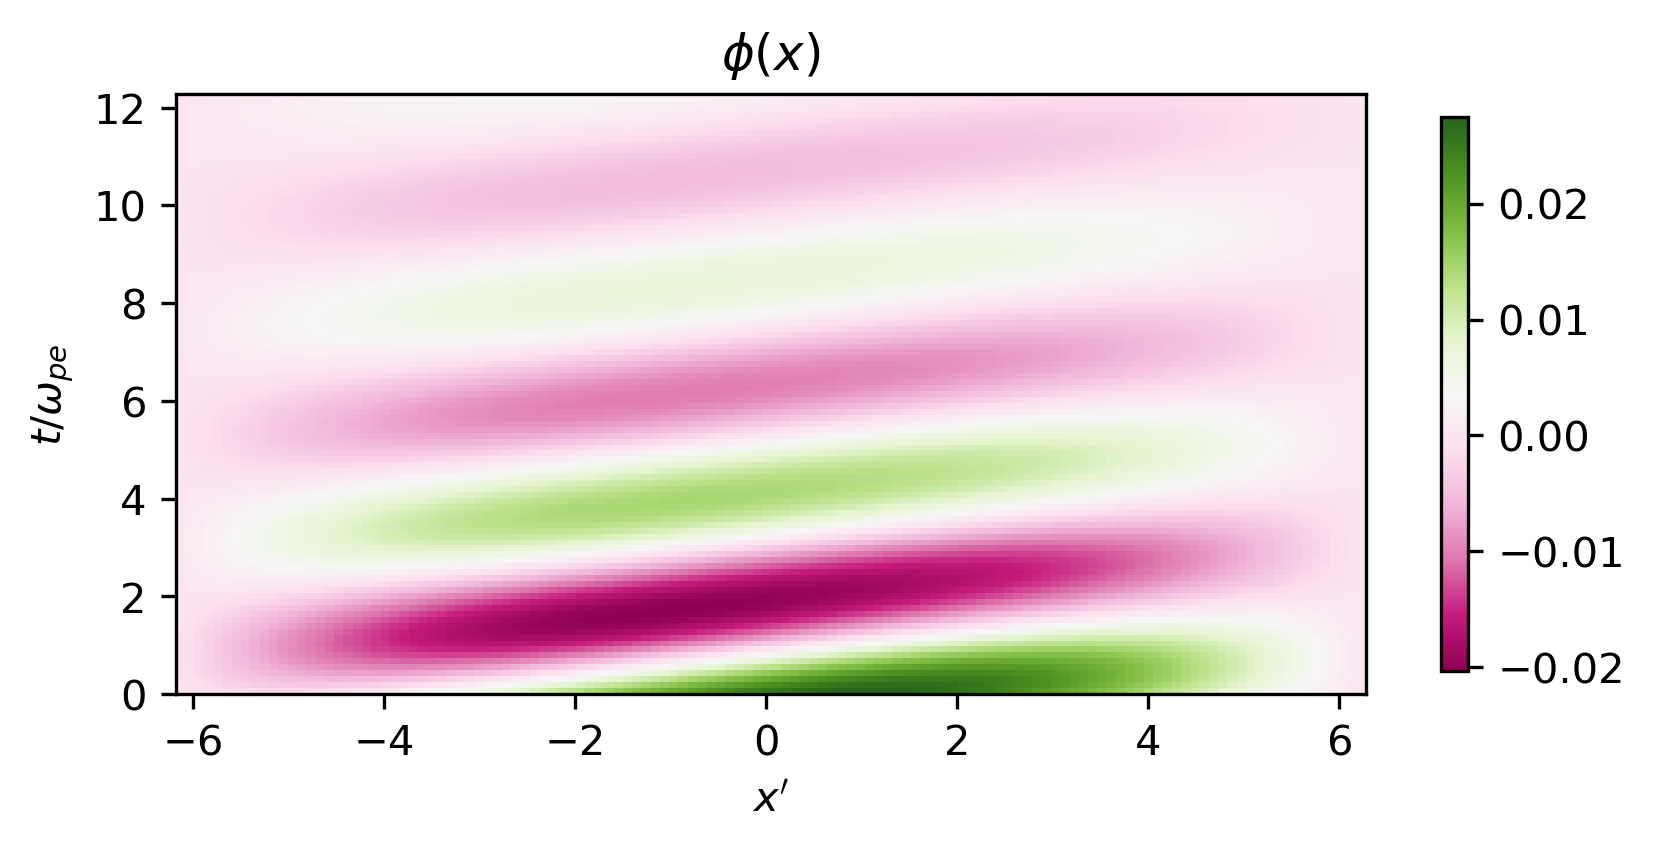

In [40]:
# plt.plot(data_phi[:,0])
# plt.plot(data_phi[:,1])
# plt.xlim([0,2**7-1])

## Phi file data format
## t,x(j),phi(j),rho(j),dphidx(j)

nt_phi = int(len(data_phi)/nx)
phi = np.reshape(data_phi[:,2],[nx,nt_phi],order='F')
rho = np.reshape(data_phi[:,3],[nx,nt_phi],order='F')
E = rho = np.reshape(data_phi[:,4],[nx,nt_phi],order='F')

plt.figure(figsize=(5,3))
print(f"phi shape:{np.shape(phi)}")

# for i in range(0,10,2):
for i in range(0,np.shape(phi)[1],5):
    plt.plot(phi[:,i],label=str(i))

    
plt.xlabel(r'$x^\prime$')
plt.ylabel(r'$\phi(x)$')

#plt.plot([0,64],[0,0],'k:')
# plt.legend()

plt.figure(dpi=300)
plt.imshow(np.transpose(phi),
           origin='lower',
           extent=[x_ax[0],x_ax[-1],0,t_ax[-1]],
           aspect=x_ax[-1]/t_ax[-1],
           cmap='PiYG')
plt.title(r'$\phi(x)$')
plt.xlabel('$x^\prime$')
plt.ylabel('$t/\omega_{pe}$')
plt.colorbar(shrink=.5)

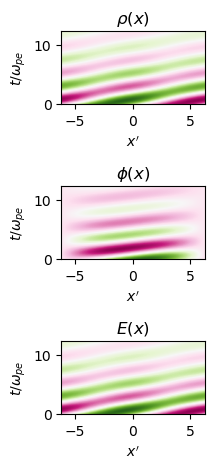

In [14]:
plt.subplot(311)
plt.imshow(np.transpose(rho),
           origin='lower',
           extent=[x_ax[0],x_ax[-1],0,t_ax[-1]],
           aspect=x_ax[-1]/t_ax[-1],
           cmap='PiYG')
plt.title(r'$\rho(x)$')
plt.xlabel('$x^\prime$')
plt.ylabel('$t/\omega_{pe}$')

plt.subplot(312)
plt.imshow(np.transpose(phi),
           origin='lower',
           extent=[x_ax[0],x_ax[-1],0,t_ax[-1]],
           aspect=x_ax[-1]/t_ax[-1],
           cmap='PiYG')
plt.title(r'$\phi(x)$')
plt.xlabel('$x^\prime$')
plt.ylabel('$t/\omega_{pe}$')

plt.subplot(313)
plt.imshow(np.transpose(E),
           origin='lower',
           extent=[x_ax[0],x_ax[-1],0,t_ax[-1]],
           aspect=x_ax[-1]/t_ax[-1],
           cmap='PiYG')
plt.title(r'$E(x)$')
plt.xlabel('$x^\prime$')
plt.ylabel('$t/\omega_{pe}$')



plt.tight_layout()
# #plt.colorbar(shrink=.5)

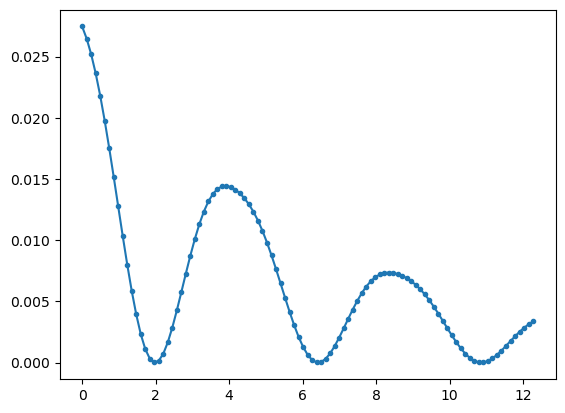

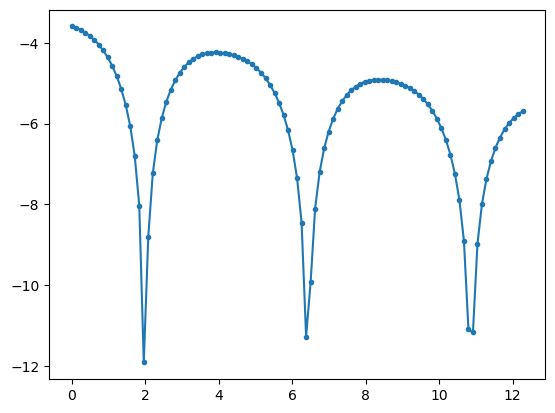

In [15]:
t = data_phi[0:-1:nx,0]
phi_max = np.max(phi,axis=0)
plt.plot(t,phi_max,'.-')

tt = np.arange(1,150)

# m = -.09
# c = 80
# y = m*tt + c;

plt.figure()

plt.plot(t,np.log(phi_max),'.-')

## Energy plots

f90 code to output data

    !write(e_fmt,'(a,i0,a)')'(i6,1f12.4,2es15.7,',16*nspec,'es15.7)'
    !write(e_unit,e_fmt) &
    
    jt,t,etot,ephi,efs(1:nspec),&
    1efs0(1:nspec),efsb(1:nspec),efsw(1:nspec),efsc(1:nspec),&
    efswl(1:nspec),efswnb(1:nspec),efswnw(1:nspec),efswnc(1:nspec),&
    edecs(1:nspec),eintdecs(1:nspec),eqcs(1:nspec), &
    ekos(1:nspec),ekos0(1:nspec),ekos1(1:nspec),ekos2(1:nspec)'''

Text(0.5, 0, 't')

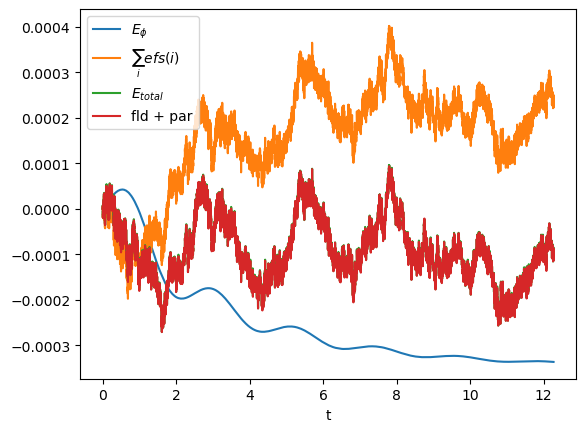

In [16]:
data = np.loadtxt(file_energy)

e_fld = data[:,3]-data[0,3]
t = data[:,1]
plt.plot(t,e_fld,label='$E_\phi$') #ephi

e_part = data[:,4]-data[0,4]+data[:,5]-data[0,5]

try:
    print(f_4[0])
    e_part = data[:,4]-data[0,4]+data[:,5]-data[0,5]+data[:,6]-data[0,6]+data[:,7]-data[0,7]
    
    
    try:
        e_part = e_part + data[:,8]-data[0,8]+data[:,9]-data[0,9]
    except:
        print('5/6 species not found')
except:
    pass

plt.plot(t,e_part,label='$\sum_i efs(i)$') #efs(0)
# #plt.plot() #efs(1)

plt.plot(t,data[:,2]-data[0,2],label = '$E_{total}$')
plt.plot(t,e_fld+e_part,label = 'fld + par')

## old data with no bump
 #import scipy as sp

# dat = sp.io.loadmat('./exp4_data.mat')
# plt.plot(t,dat['fld'][0,:])
# plt.plot(t,dat['part'][0,:])
# plt.plot(t,dat['total'][0,:])

plt.legend()
# plt.xlim([0,1])
plt.xlabel('t')

(10001, 12)


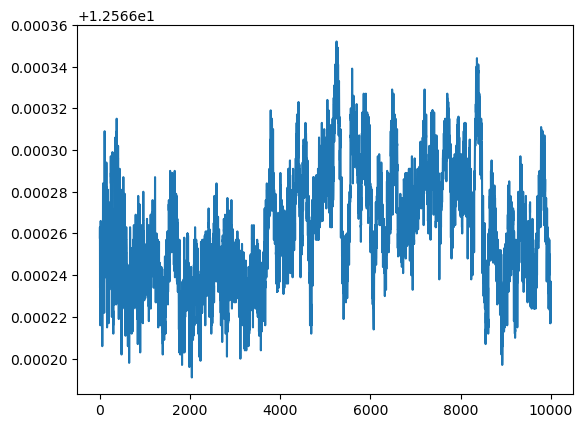

In [17]:
# use the number files 

# f90 format 
# jt,t,ns(1:nspec),ns0(1:nspec),nsb(1:nspec),nsw(1:nspec),nsc(1:nspec)

data_1 = np.loadtxt(file_number)
print(np.shape(data_1))

plt.plot(data_1[:,2])



In [18]:
# exp_data = {}
# exp_data['fld'] = e_fld
# exp_data['part'] = e_part
# exp_data['total'] = data[:,2]-data[0,2]
# exp_data['t'] = data[:,1]
# exp_data['run_id'] = run_id

# import scipy as sp

# sp.io.savemat(f'./exp_{run_id}_data.mat',exp_data)

## FPC diagnostic

(257, 128, 101)
(128, 101)
(257, 128, 101)
(257, 128, 101)


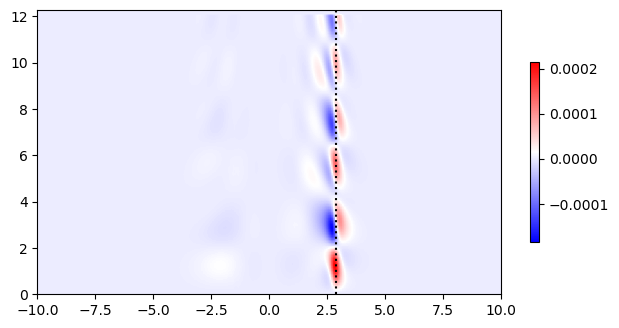

In [19]:
print(f_1.shape)
print(E.shape)

fpc_final = np.zeros([nv,nt-2])
x_i = 0

df = np.zeros_like(f_1)

for t_i in range(1,nt-2):
    df[:,:,t_i] = f_1[:,:,t_i]-f_1[:,:,0]

ddf_dv = np.gradient(df,axis=0,edge_order=1)/(v_ax[1]-v_ax[0])
ddf_dx = np.gradient(df,axis=1,edge_order=1)/(x_ax[1]-x_ax[0])
edat = -E[x_i,:]  

print(ddf_dv.shape)
print(ddf_dx.shape)

term_3 = np.transpose(ddf_dv[:,x_i,:]*edat)*v_ax**2*.5
    
#fpc = df#*E[:,t_i]    
#fpc_final[:,t_i] = np.sum(fpc,axis=1)
    
plt.imshow(term_3,
           cmap='bwr',
           origin='lower',
           extent=[v_ax[0],v_ax[-1],0,t_ax[-1]],
           aspect = 1
          )
plt.colorbar(shrink=.4)
plt.tight_layout()

plt.plot([v_phi,v_phi],[0,t_ax[-1]],':k')

(128, 101)
(101,)


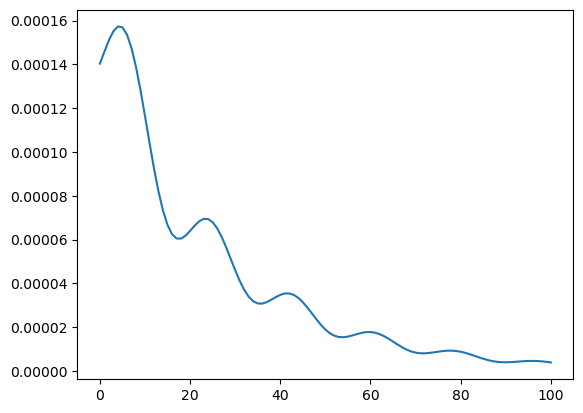

In [32]:
print(E.shape)

E_fld = np.zeros([nt])
print(E_fld.shape)
for t_i in range(0,nt):
    E_fld[t_i] = np.sum(E[:,t_i]**2)/(8*np.pi)

plt.plot(E_fld)